In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import astro_parser

plt.style.use("fivethirtyeight")

In [2]:
df = astro_parser.main()

In [3]:
authorship, tally, rank = astro_parser.time_analysis(df)

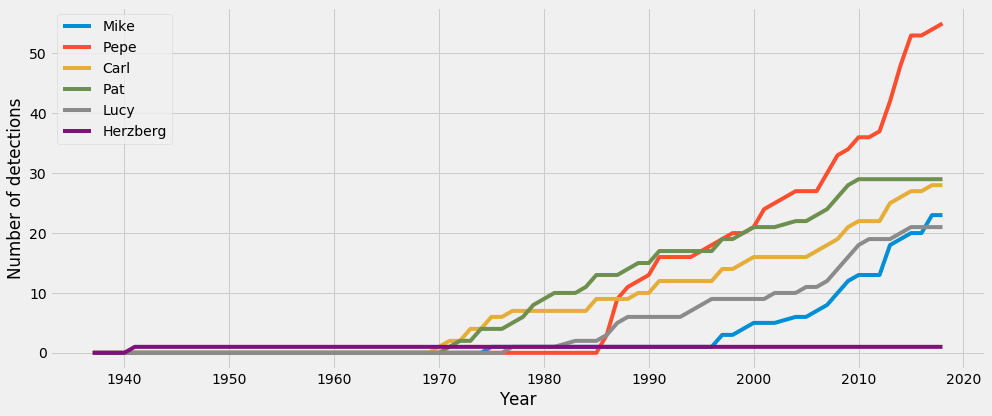

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(
    tally.index, tally["C McCarthy"], label="Mike"
)

ax.plot(
    tally.index, tally["J Cernicharo"], label="Pepe"
)

ax.plot(
    tally.index, tally["A Gottlieb"], label="Carl"
)

ax.plot(
    tally.index, tally["P Thaddeus"], label="Pat"
)

ax.plot(
    tally.index, tally["M Ziurys"], label="Lucy"
)

ax.plot(
    tally.index, tally["G Herzberg"], label="Herzberg"
)

ax.legend(loc="best")

ax.set_xlabel("Year")
ax.set_ylabel("Number of detections")
fig.tight_layout()
#fig.savefig("people.pdf", dpi=300, format="pdf")